# Data Analysis Project

## Netflix Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

In [2]:
"""1) Find out which types of genre has most movies and TV Shows
2) What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?
3) Which countries contribute the most to the content library?
4) What is the average duration of movies, and how does it vary across different ratings?
5) What are the most common ratings, and how are they distributed across different types of content?
"""

'1) Find out which types of genre has most movies and TV Shows\n2) What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?\n3) Which countries contribute the most to the content library?\n4) What is the average duration of movies, and how does it vary across different ratings?\n5) What are the most common ratings, and how are they distributed across different types of content?\n'

In [3]:
data=pd.read_csv("netflix_movies.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
print("total rows in a dataset:",len(data))

total rows in a dataset: 8807


In [7]:
data=data.drop_duplicates()
print("After removing duplicates values:",len(data))

After removing duplicates values: 8807


In [8]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Replaced null values by mode value

In [10]:
# Function to replace null values with mode
def replace_null(data, col):
    mode_value = data[col].mode()[0] 
    data[col] = data[col].fillna(mode_value)  


columns_to_replace = ["director", "cast", "country", "date_added", "duration", "rating"]
for col in columns_to_replace:
    replace_null(data, col)

In [11]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
data['date_added'] = pd.to_datetime(data['date_added'],format='mixed', errors='coerce')

In [13]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

# 1) Find out which types of genre has most movies and TV Shows

In [14]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [14]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [15]:
data['listed_in'].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [16]:
data['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [17]:
types=data[['type','listed_in']]
types.head()

,type,listed_in
0,Movie,Documentaries
1,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,"Docuseries, Reality TV"
4,TV Show,"International TV Shows, Romantic TV Shows, TV ..."


In [18]:
movies=types[types['type']=='Movie']
movies.head()

,type,listed_in
0,Movie,Documentaries
6,Movie,Children & Family Movies
7,Movie,"Dramas, Independent Movies, International Movies"
9,Movie,"Comedies, Dramas"
12,Movie,"Dramas, International Movies"


In [19]:
movies['listed_in'].value_counts()

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Sci-Fi & Fantasy                                      1
Sports Movies                                         1
Children & Family Movies, Comedies, Cult Movies       1
Cult Movies, Dramas, Music & Musicals                 1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 278, dtype: int64

In [20]:
top=movies['listed_in'].value_counts().head().index

filtered_movies = movies[movies['listed_in'].isin(top)]

# in this i taken onlt top 5 becuase listed_in values are so many and big in graphs aslo it is difficult to view

Text(0.5, 1.0, 'Top Genre in Movies')

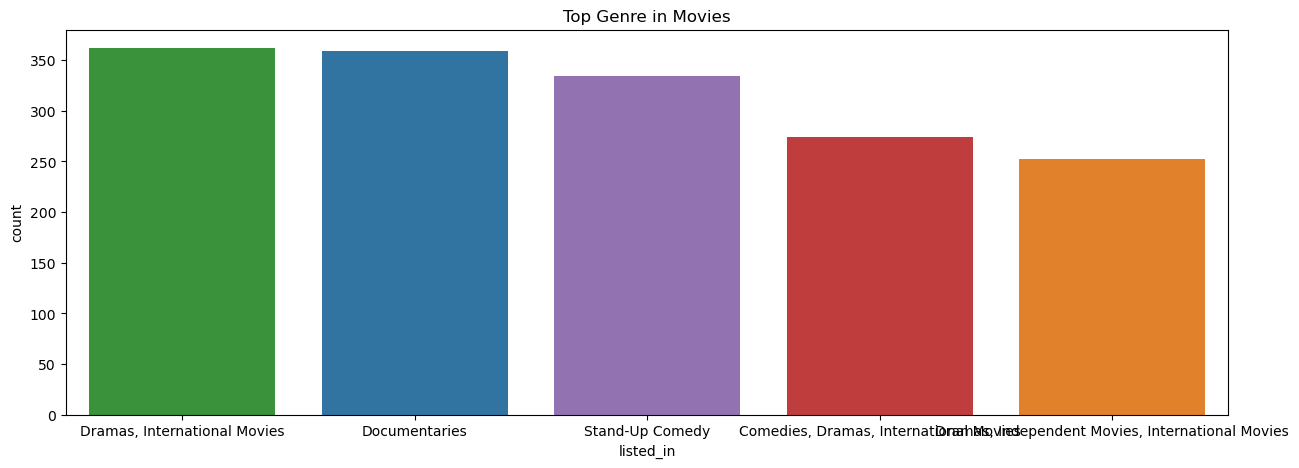

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_movies,x='listed_in',order=top,hue='listed_in',orient='y')
plt.title("Top Genre in Movies")

In [22]:
tv_shows=types[types['type']=='TV Show']
tv_shows.head()

,type,listed_in
1,TV Show,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,"Docuseries, Reality TV"
4,TV Show,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,"TV Dramas, TV Horror, TV Mysteries"


In [23]:
tv_shows['listed_in'].value_counts()

listed_in
Kids' TV                                                 220
International TV Shows, TV Dramas                        121
Crime TV Shows, International TV Shows, TV Dramas        110
Kids' TV, TV Comedies                                     99
Reality TV                                                95
                                                        ... 
Kids' TV, TV Action & Adventure, TV Dramas                 1
British TV Shows, Kids' TV, TV Thrillers                   1
Reality TV, TV Horror, TV Thrillers                        1
TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy      1
Classic & Cult TV, Crime TV Shows, TV Dramas               1
Name: count, Length: 236, dtype: int64

In [24]:
tops=tv_shows['listed_in'].value_counts().head().index

filtered_tv_shows =tv_shows[tv_shows['listed_in'].isin(tops)]

# in this i taken onlt top 5 becuase listed_in values are so many and big in graphs aslo it is difficult to view

Text(0.5, 1.0, 'Top Genre in Tv Shows')

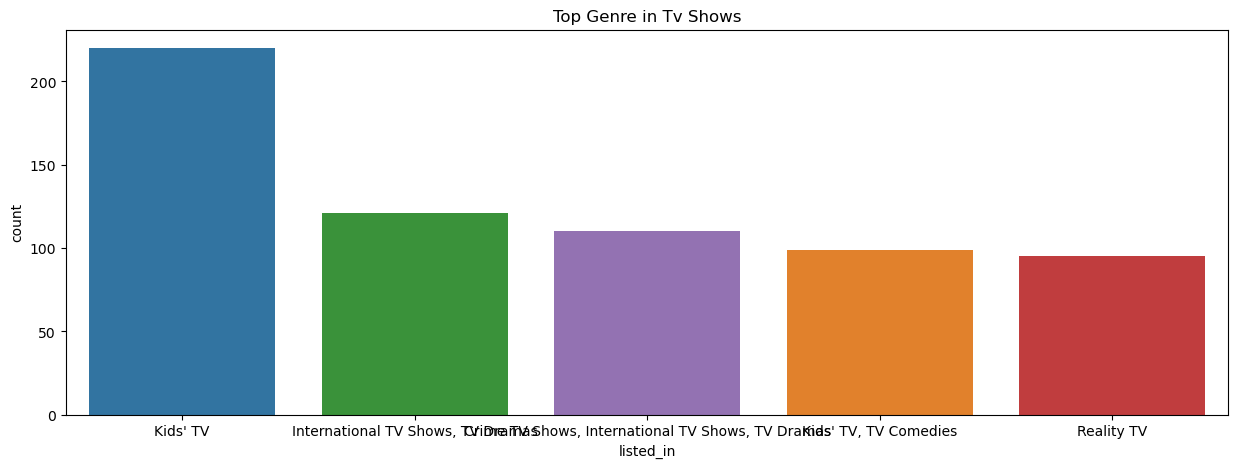

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_tv_shows,x='listed_in',order=tops,hue='listed_in',orient='y')
plt.title("Top Genre in Tv Shows")

In [33]:
df=data[['type','listed_in']].value_counts().reset_index()
df.columns = ['type', 'listed_in', 'count']

df=df.head(10)


<Axes: xlabel='count', ylabel='listed_in'>

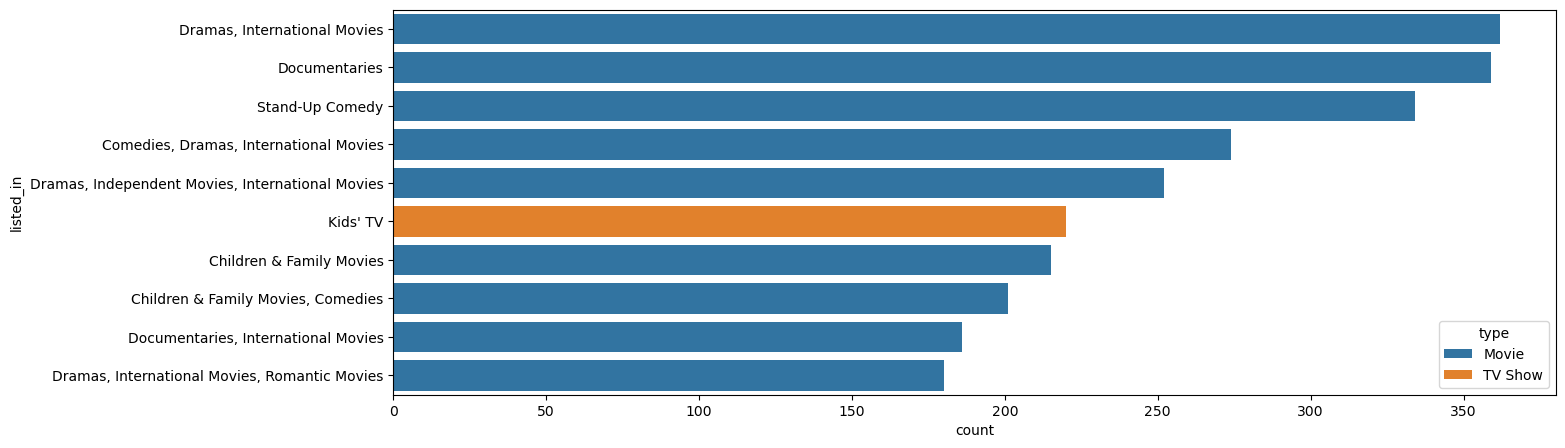

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='count',y='listed_in',hue='type',orient='h')

# 2) What is the distribution of content types (e.g., Movies vs. TV Shows) in the dataset?

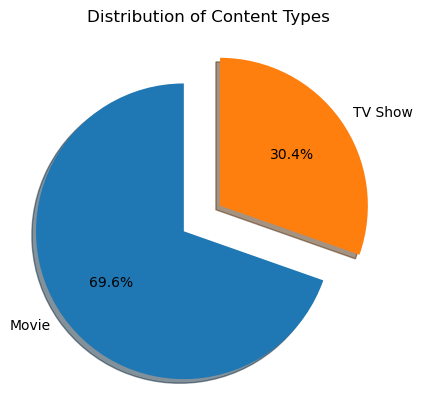

In [27]:
type_counts = data['type'].value_counts()
explode=[0.2,0.1]

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90,
       shadow=True,explode=explode)
plt.title('Distribution of Content Types')
plt.show()

# 3) Which countries contribute the most to the content library?

In [28]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [29]:
top_country=data[['type','country']]
top_country.head()

,type,country
0,Movie,United States
1,TV Show,South Africa
2,TV Show,United States
3,TV Show,United States
4,TV Show,India


In [30]:
top_country['country'].value_counts()

country
United States                             3649
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [31]:
top_country1 = top_country['country'].value_counts().head(5).index

filtered_top_country = top_country[top_country['country'].isin(top_country1)]

Text(0.5, 1.0, 'Contributes the most content library')

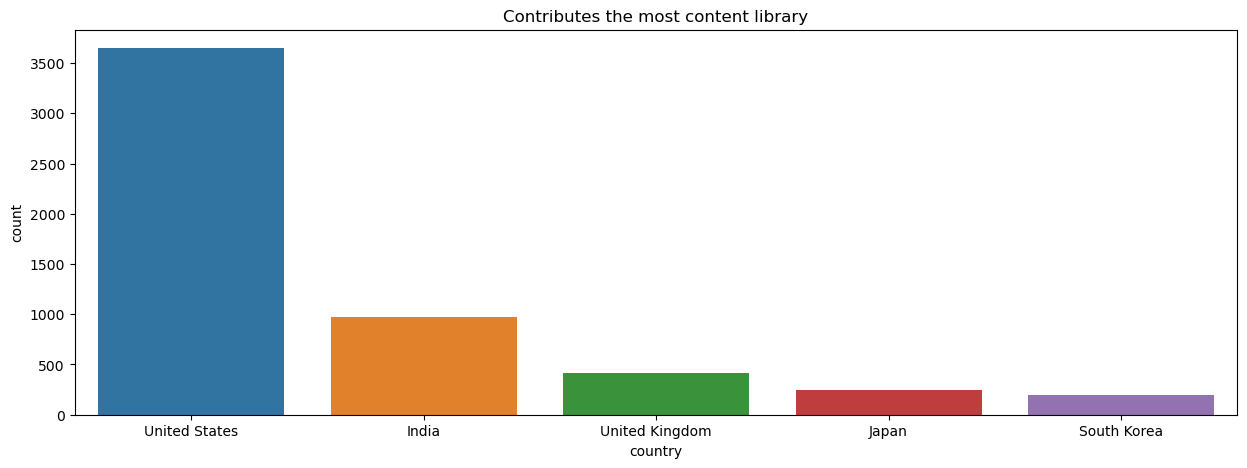

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_top_country,x='country',order=top_country1,hue='country',orient='y')
plt.title("Contributes the most content library")

# 5) What are the most common ratings, and how are they distributed across different types of content?

In [33]:
data['rating'].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Common ratings given to Movies or Tv Shows')

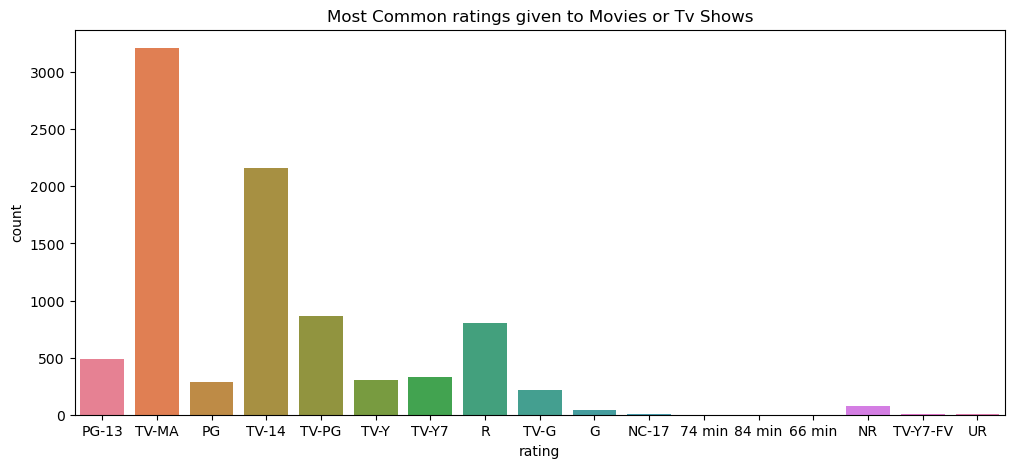

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='rating',hue='rating')
plt.title("Most Common ratings given to Movies or Tv Shows")